# Einführung 
Autor: Frederik Rentzsch, 

Bei Fragen und Anmerkungen bitte eine Mail an f.rentzsch@tu-berlin.de

\\

In diesem Notebook werden wir sehen, wie man mit dem Lagrange-Formalismus und der Hilfe von `SymPy` die Aufstellung von Bewegungsgleichungen automatisieren kann. Da die Bewegungsgleichungen in der Regel nicht analytisch gelöst werden können, wird im Anschluss daran kurz auf die numerische Lösung von Bewegungsgleichungen eingegangen.  

# Automatische Generierung der Bewegungsgleichung mit dem Lagrange-Formalismus

Wir zeigen zunächst wie man den Prozess aus dem Tutorium, d.h. das Aufstellen von Bewegungsgleichungen mit dem Lagrange-Formalismus mithilfe von `SymPy` automatisieren kann. Als Beispiel soll uns hierfür die 3. Aufgabe aus dem 5. Tutorium herhalten. 
Zunächst müssen wir die Systemparameter und die unabhängige Variable, die Zeit $t$ definieren. Im Anschluss daran wird die generalisierte Koordinate, der Winkel $\varphi$ erstellt. Danach verwenden wir hauptsächlich die Funktionen `Matrix` (zum Erstellen von Vektoren), `diff` (zum Ableiten) und `dot` (zum Berechnen des Skalarprodukts). 

In [15]:
from sympy import *

# Parameter
m1, m2, g, l, t = symbols('m1 m2 g l t')
# Generalisierte Koordinate
phi = Function('varphi')(t)
dphi = diff(phi,t)

# Ortvektoren 
r1 = Matrix([0, 2*l*cos(phi)]) 
r2 = l*Matrix([sin(phi), cos(phi)])

# Geschwindigkeitsvektoren
v1 = diff(r1,t)
v2 = diff(r2,t)

# Kinetische Energie
T = 1/2*m1*v1.dot(v1) + 1/2*m2*v2.dot(v2)

# Potentielle Energie (Achtung: r1[1] liefert den 2. Eintrag (also den y-Wert) von r1 und NICHT den 1.)
U = m1*g*r1[1] + m2*g*r2[1]

# Lagrange-Funktion
L = T - U

# Lagrange-Gleichungen 2. Art liefern die Bewegungsgleichungen (hier nur eine)
Eq(diff(L,dphi,t) - diff(L,phi), 0)

l*(-2.0*g*m1*sin(varphi(t)) - 1.0*g*m2*sin(varphi(t)) + 2.0*l*m1*sin(2*varphi(t))*Derivative(varphi(t), t)**2 - 2.0*l*m1*cos(2*varphi(t))*Derivative(varphi(t), (t, 2)) + 2.0*l*m1*Derivative(varphi(t), (t, 2)) + 1.0*l*m2*Derivative(varphi(t), (t, 2)))

An diesem Ergebnis können wir offenbar noch ein paar Vereinfachungen (z.B. $\sin^2\varphi+\cos^2\varphi = 1$) vornehmen, weshalb sich die Darstellung hier von der im Tutorium unterscheidet. Insgesamt ist es aber nicht schwer zu erkennen, dass die beiden Darstellungen der Bewegungsgleichung äquivalent sind.

# Numerische Integration mit dem expliziten Euler-Verfahren


Als nächstes wird das [explizite Euler-Verfahren](https://de.wikipedia.org/wiki/Explizites_Euler-Verfahren), mit dem die numerische Integration von Bewegungsgleichungen erfolgen kann, vorgestellt. Zur Erklärung des Verfahrens nehmen wir an, dass die zu integrierende Differentialgleichung in der Form 

$$
\begin{cases}
  \dot{\vec{x}}(t) = \vec{f}(\vec{x}(t)) \, , \\
  \vec{x}(0) = \vec{x}_0 
\end{cases}
$$

vorliegt, es sich also um ein (explizites, autonomes) Differentialgleichungssystem 1. Ordnung handelt. Formal können wir dieses integrieren und erhalten zunächst 

$$
\vec{x}(t) = \vec{x}_0 + \int_0^t \vec{f}(\vec{x}(\tau)) d \tau \, .
$$

Sind wir in der vorteilhaften (aber unwahrscheinlichen) Lage eine Stammfunktion von $\vec{f}$ zu kennen, sind wir an dieser Stelle fertig. In den meisten (interessanten) Fällen können wir jedoch keine Stammfunktion von $\vec{f}$ angeben (oder diese ist so kompliziert, dass wir sie nicht angeben möchten), weshalb wir uns oft mit einer numerischen Näherungslösung begnügen müssen.
Für die numerische Lösung wird die Zeitachse in $n \in \mathbb{N}$ äquidistante Stützstellen 

$$
t_i = h i \, , \quad i = 0, \dots, n
$$

mit der Schrittweite $h$ unterteilt. Damit lässt sich die Lösung an den Stützstellen als Rekursionsgleichung 

$$
\vec{x}(t_{i+1}) = \underbrace{\vec{x}_0 + \int_0^{t_i} \vec{f} (\vec{x}(t)) dt}_{\vec{x}(t_i)} + \int_{t_i}^{t_{i+1}} \vec{f}(\vec{x}(t)) dt \, , \quad i = 0, \dots, n-1
$$

aufschreiben. Für hinreichend kleines $h$ gilt näherungsweise 

$$
\int_{t_i}^{t_{i+1}} \vec{f}(\vec{x}(t)) dt \approx h \cdot \vec{f}(\vec{x}(t_i))
$$

und wir erhalten die rekursive Approximationsformel

$$
\text{expl. Euler-Verfahren:} \quad 
\vec{x}(t_{i+1}) = \vec{x}(t_i) + h \cdot \vec{f}(\vec{x}(t_i)) \, .
$$
 
# Beispiel aus dem Tutorium

Zur Illustration des Verfahrens greifen wir auf die in Aufgabe 3 aufgestellte Bewegungsgleichung des 5. Übungsblatts, die wir weiter oben mit dem Lagrange-Formalismus hergeleitet haben, zurück. Diese müssen wir zuerst in ein DGL-System 1. Ordnung umwandeln. Die Bewegungsgl. lautet (nach den oben angedeuteten Umformungen)

$$
0 = 4 m_1 l^2 \left(\ddot{\varphi} \sin^2\varphi + \dot{\varphi}^2 \sin\varphi \cos\varphi \right) + m_2 l^2 \ddot{\varphi} - (2m_1 + m_2) g l \sin\varphi  \, .
$$ 

Wir definieren nun $x_1 := \varphi$, $x_2 := \dot{\varphi} = \dot{x}_1$ und erhalten nach dieser Umbenennung der (von $t$ abhängigen) Variablen

$$
\dot{\vec{x}} = 
\begin{pmatrix}
x_1 \\ 
x_2
\end{pmatrix} 
= 
\begin{pmatrix} 
  x_2 \\
  \frac{1}{4 m_1 l \sin^2 x_1 + m_2 l} \left[ (2m_1 + m_2) g \sin x_1 - 4 m_1 l x_2^2 \sin x_1 \cos x_1   \right]
\end{pmatrix}
=
\vec{f}(\vec{x}) \, .
$$

Als Anfangsbedingungen wählen wir (willkürlich) $\varphi(0) = x_1(0)= 1$, was in etwa $57°$ entspricht und $\dot{\varphi}(0) = x_2(0) = 0 \, \frac{1}{\mathrm{s}}$. 

\\
Der folgende Pyhton-Code implementiert ein simples Programm zur numerischen Lösung von Bewegungsgleichungen. Es kann das expl. Euler-Verfahren als Algorithmus ausgewählt werden um die oben angegebene Bewegungsgl. zu integrieren. Es kann aber auch eine andere Bewegungsgl. verwendet werden. Dafür ist in der zweiten Codezelle die Funktion `f(x,params)` und eventuell die Schrittweite anzupassen. Desweiteren ist ein zusätzlicher Algorithmus, das sogenannte [klassische Runge-Kutta-Verfahren](https://de.wikipedia.org/wiki/Klassisches_Runge-Kutta-Verfahren), eingebaut. Dieses wertet $\vec{f}$ insgesamt vier mal pro Zeitschritt aus, das expl. Euler-Verfahren hingegen nur einmal. Das Runge-Kutta-Verfahren ist somit bei gleicher Schrittweite $h$ etwa vier mal so teuer wie das expl. Euler-Verfahren, liefert aber, wie wir sehen werden, auch deutlich genauere Ergebnisse.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ode_solve(ode_rhs,init,t,algorithm):
  """Simples Programm zur numerischen Integration von Anfangswertproblemen
  ode_rhs: rechte Seite der DGL 1. Ordnung
  init: Anfangsbedingungen
  t: Zeitachse 
  algorithm: Algorithmus zur Berechnung des nächsten Zeitschrittes"""
  # Überprüfe ob die Abstände in t äquidistant sind
  if np.any(np.diff(t,n=2) > 1e-9):
    raise Exception("Die Abstände in t müssen äquidistant sein.")

  x = np.zeros((init.shape[0],len(t)))
  x[:,0] = init
  h = t[1]-t[0] # Schrittweite
  for i in range(len(t)-1):
    x[:,i+1] = algorithm(ode_rhs,x[:,i],h)
  return x

def explicit_euler(ode_rhs,x_old,step):
  """berechnet nächsten Zeitschritt mit explizitem Euler-Verfahren"""
  x_new = x_old + ode_rhs(x_old) * step
  return x_new

def RK4(ode_rhs,x_old,step):
  """berechnet nächsten Zeitschritt mit klassischem Runge-Kutta-Verfahren (4. Ordnung)"""
  k1 = ode_rhs(x_old)
  k2 = ode_rhs(x_old + step*k1/2)
  k3 = ode_rhs(x_old + step*k2/2)
  k4 = ode_rhs(x_old + step*k3)
  x_new = x_old + 1/6 * step * (k1+2*k2+2*k3+k4)
  return x_new


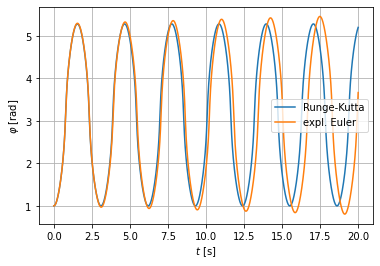

In [21]:
# die rechte Seite f unseres DGL-Systems 
def f(x,params):
  """wertet die rechte Seite der DGL 1. Ordnung aka f(x) aus"""
  m1, m2, l, g = params
  x1 = x[0]
  x2 = x[1]
  return np.array([x2, 1/(4*m1*l*np.sin(x1)**2+m2*l) * ((2*m1+m2)*g*np.sin(x1) - 4*m1*l*x2**2*np.sin(x1)*np.cos(x1))])


m1 = 1 # Masse 1 [kg]
m2 = 1 # Masse 2 [kg]
l = 1  # Stangenlänge [m]
g = 9.81 # Erdbeschleunigung [m/s^2]
params = np.array([m1,m2,l,g]) 

ode_rhs = lambda x: f(x,params)

hEE = 0.001 # Schrittweite [s] für expl. Euler-Verfahren
tend = 20 # Ende der Integration [s]
tEE = np.linspace(0,tend,round(tend/hEE)) # Zeitvektor [s]
x0 = np.array([1,0]) # Anfangsbedingungen (Winkel [1], Winkelgeschw. [1/s])


xEE = ode_solve(ode_rhs,x0,tEE,explicit_euler)

hRK = 0.01 # Schrittweite [s] für Runge-Kutta-Verfahren
tRK = np.linspace(0,tend,round(tend/hRK)) # Zeitvektor [s]

xRK = ode_solve(ode_rhs,x0,tRK,RK4)

plt.plot(tRK,xRK[0,:],label="Runge-Kutta")
plt.plot(tEE,xEE[0,:],label="expl. Euler")
plt.grid(True)
plt.legend()
plt.xlabel(r"$t$ [s]")
plt.ylabel(r"$\varphi$ [rad]")
plt.show()

*Verständnisfrage*: In obigem Plot ist $\varphi$ (in rad) über $t$ (in 
s) aufgetragen. Der Maximalwert des mit dem Runge-Kutta-Verfahren bestimmten $\varphi$ beträgt ca. 5,3 rad, was etwa 304° entspricht. Entspricht dieses Ergebnis Ihren Erwartungen? Gibt es einen Zeitpunkt ab dem der gezeigte Verlauf ungültig ist? Falls ja, wieso?

# Vergleich der beiden Lösungen

Wie wir sehen, entfernen sich die mit den beiden Verfahren bestimmten zeitlichen Verläufe $\varphi$ mit zunehmender Zeit voneinander. Da dem mechanischen System (s. Aufgabenblatt 5) weder Energie zugeführt noch entzogen wird, liegt die Vermutung nahe, dass die Schwingung periodisch verlaufen muss. Das Aufklingen der mit dem expl. Euler-Verfahren gefundenen Lösung ist somit unphysikalisch und ein rein numerisches Phänomen. Diese numerische Instabilität können wir durch Wahl einer kleineren Schrittweite beseitigen. Dadurch wächst aber wiederum die Rechenzeit an. Bei dem Vergleich ist zudem zu beachten, dass für das Runge-Kutta-Verfahren eine Schrittweite (im Code `hRK`) von $h=0,01$ und für das expl. Euler-Verfahren (im Code `hEE`) von $h=0,001$ gewählt wurde. Das Runge-Kutta-Verfahren ist somit genauer als das expl. Euler-Verfahren und wir sollten das Ergebnis nach etwa der Hälfte der Rechenzeit erhalten. Diese Annahme können wir mit den folgenden Zeilen Code überprüfen:

In [12]:
print("Explizites Euler-Verfahren:")
%timeit ode_solve(ode_rhs,x0,tEE,explicit_euler)
print("\nRunge-Kutta-Verfahren:")
%timeit ode_solve(ode_rhs,x0,tRK,RK4)

Explizites Euler-Verfahren:
10 loops, best of 5: 210 ms per loop

Runge-Kutta-Verfahren:
10 loops, best of 5: 113 ms per loop


Eine genaue Untersuchung der beiden Verfahren (Stichworte sind hier unter anderem Konsistenz- und Konvergenzordnung) ist Aufgabe der Numerischen Analysis und geht über diese extrem kurze Einführung hinaus. An dieser Stelle sei angemerkt, dass alle großen Programmiersprachen (mindestens) eine Bibliothek zur numerischen Integration von Bewegungsgleichungen enthalten. Python ist hier keine Ausnahme. Die entsprechende Bibliothek heißt `scipy.integrate`. Dies bedeutet, dass wir die in der Literatur enthaltenen Algorithmen in der Regel nicht selbst, wie hier geschehen, implementieren müssen. Stattdessesn können wir auf der Arbeit von Numerik-Expert*innen aufbauen. Dennoch ist es keine gute Idee den Ergebnissen blind zu vertrauen. Wir sollten, wie jedes andere Ergebnis auch, numerische Berechnungen immer auf Plausibilität überprüfen. Hier haben wir unser mechanisches Verständnis verwendet um das Aufklingen der mit dem expl. Euler-Verfahren berechneten Lösung als Fehler zu erkennen. Eine weitere, einfache Möglichkeit die bestimmte Lösung zu überprüfen kann hier erfolgen, indem die Gesamtenergie $E = T + U$ dargestellt wird. Wie oben bereits angedeutet, handelt es sich um ein konservatives System und es gilt somit $E = \mathrm{konst.}$ Der folgende Code berechnet und plottet die Energiefunktion mit den Verläufen von $\varphi$ und $\dot{\varphi}$, jeweils gewonnen mit dem  expl. Euler- und dem Runge-Kutta-Verfahren. 

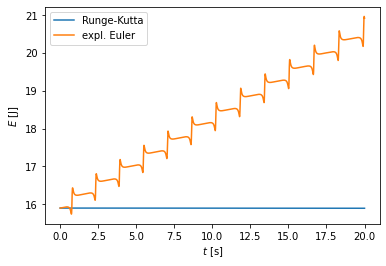

In [22]:
energie = lambda x, dx: 1/2*l*(2*g*(2*m1+m2)*np.cos(x)+l*(2*m1+m2-2*m1*np.cos(2*x))*dx**2)
plt.plot(tRK,energie(xRK[0,:],xRK[1,:]),label="Runge-Kutta")
plt.plot(tEE,energie(xEE[0,:],xEE[1,:]),label="expl. Euler")
plt.xlabel(r"$t$ [s]")
plt.ylabel(r"$E$ [J]")
plt.legend()
plt.show()

Unter Verwendung des expl. Euler-Verfahrens driftet die Gesamtenergie stufenartig davon. Beim Runge-Kutta-Verfahren hingegen ist bei dieser Auflösung mit bloßem Auge keine Veränderung der Energiefunktion über der Zeit zu erkennen.